# KNN Classifier

Load data and primary analysis

In [1]:
import numpy as np 
import pandas as pd 

In [10]:
data = pd.read_csv('Social_Net_class.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [12]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


- After analysing, came to conclusion that we need to drop 'user ID' and encode 'Gender'
- Also there is need of feature scaling but we first train a KNN classifier without feature scaling, evaluate its performance,    and then apply feature scaling for comparison

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [13]:
# Drop User ID column and encode Gender
data = data.drop(columns=['User ID'])
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [14]:
# Separate features and output variable
X = data[['Gender', 'Age', 'EstimatedSalary']]
y = data['Purchased']

In [15]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.head(), y_train.head()

(     Gender  Age  EstimatedSalary
 157       1   29            75000
 109       0   38            80000
 17        1   45            26000
 347       0   54           108000
 24        1   46            23000,
 157    0
 109    0
 17     1
 347    1
 24     1
 Name: Purchased, dtype: int64)

find value of K value

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score,recall_score,f1_score,r2_score
from sklearn.metrics import accuracy_score, confusion_matrix

In [19]:
for i in range(1,11):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print('for k value:',i,'precision is:',precision_score(y_test,y_pred,average='weighted'))

for k value: 1 precision is: 0.7914259734702611
for k value: 2 precision is: 0.7779528096017458
for k value: 3 precision is: 0.7914259734702611
for k value: 4 precision is: 0.7929122807017543
for k value: 5 precision is: 0.8266631835597354
for k value: 6 precision is: 0.7994885433715221
for k value: 7 precision is: 0.8058333333333334
for k value: 8 precision is: 0.7862847222222221
for k value: 9 precision is: 0.8190981432360743
for k value: 10 precision is: 0.7862847222222221


In [28]:
from sklearn.metrics import f1_score,confusion_matrix,roc_auc_score
f1_list=[]  # list for f1_score
k_list=[] # list for K value
for k in range(1,11):
    clf=KNeighborsClassifier(n_neighbors=k,n_jobs=-1)
    clf.fit(X_train,y_train)
    pred=clf.predict(X_test)
    f=f1_score(y_test,pred,average='macro')
    f1_list.append(f)
    k_list.append(k)

In [29]:
best_f1_score=max(f1_list)
best_k=k_list[f1_list.index(best_f1_score)]
print("Optimum K value=",best_k," with F1-Score=",best_f1_score)

Optimum K value= 5  with F1-Score= 0.79375


Text(0.5, 1.0, 'K neigbours vs f1_score')

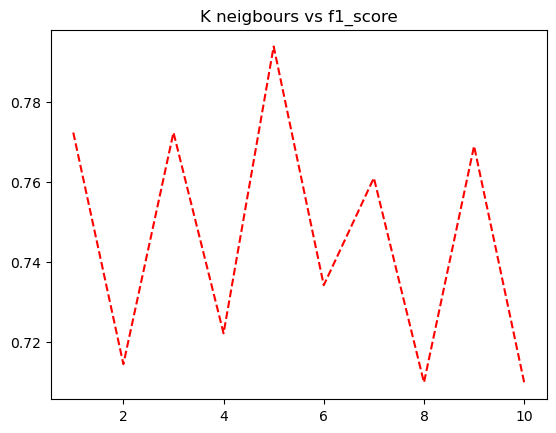

In [31]:
import matplotlib.pyplot as plt
plt.plot(k_list,f1_list,'r--')
plt.title('K neigbours vs f1_score')

- After comparing all values, came to conclusion that k value= 5 will be the optimal option for given dataset

### KNN classifier without feature scaling

In [20]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy, conf_matrix

(0.8166666666666667,
 array([[69,  4],
        [18, 29]], dtype=int64))

Text(50.722222222222214, 0.5, 'Actual')

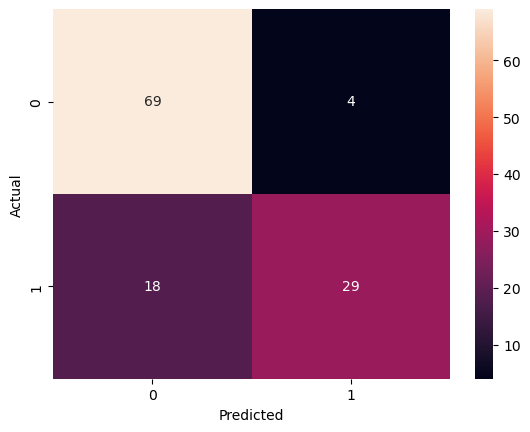

In [32]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,)
plt.xlabel('Predicted')
plt.ylabel('Actual')

Conclusion = Accuracy came near 81.66% with '4' false positive and '18' false negative.

### KNN classifier with feature scaling

In [21]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled[:3]

array([[ 1.02166316, -0.84252154,  0.1301563 ],
       [-0.97879618,  0.04175763,  0.2777019 ],
       [ 1.02166316,  0.72953032, -1.31579061]])

In [26]:
knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [27]:
y_pred_scaled = knn_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
conf_matrix_scaled = confusion_matrix(y_test, y_pred_scaled)
accuracy_scaled, conf_matrix_scaled

(0.9166666666666666,
 array([[68,  5],
        [ 5, 42]], dtype=int64))

Text(50.722222222222214, 0.5, 'Actual')

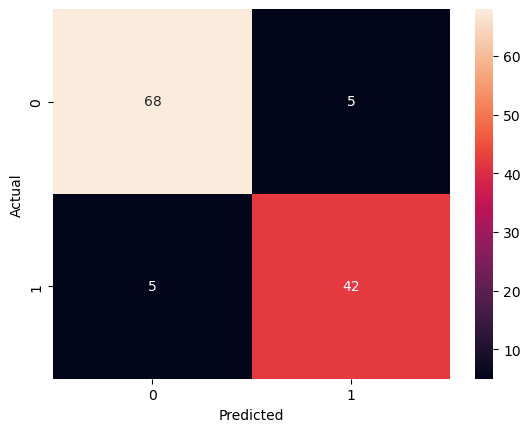

In [33]:
sns.heatmap(confusion_matrix(y_test,y_pred_scaled),annot=True,)
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Conclusion
- After feature scaling performance of model improve from 81.66% to 91.66%.